In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import pandas as pd

# Plotting function (you can modify this block change the plot)
def plot_svc_decision_function(model, ax=None, mode='train'):
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()

 # create grid to evaluate model
 x = np.linspace(xlim[0], xlim[1], 30)
 y = np.linspace(ylim[0], ylim[1], 30)
 X, Y = np.meshgrid(x, y)
 xy = np.vstack([X.ravel(), Y.ravel()]).T
 P = model.decision_function(xy).reshape(X.shape)

 if mode == 'train':
  ax.contour(X, Y, P, colors='k',
  levels=[-1, 0, 1], alpha=0.5,
  linestyles=['--', '-', '--'])
 else:
  ax.contour(X, Y, P, colors='k',
  levels=[0], alpha=0.5,
  linestyles=['-'])
 ax.set_xlim(xlim)
 ax.set_ylim(ylim)
 ax.set_title('model:'+str(model))

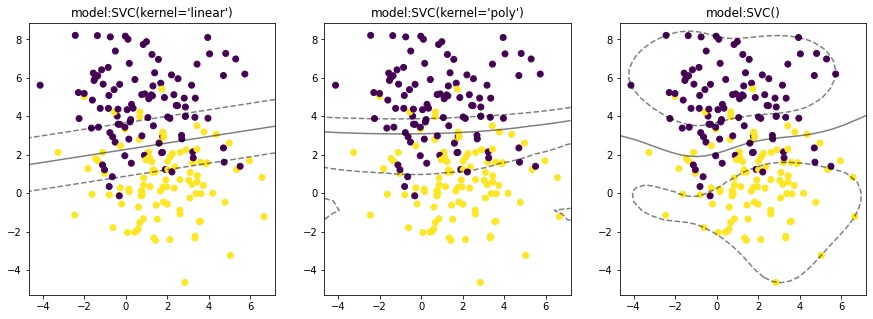

In [5]:
#1-1
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=2)
linear = SVC(kernel='linear')
poly = SVC(kernel='poly')
rbf = SVC(kernel='rbf')

linear.fit(X,y)
poly.fit(X,y)
rbf.fit(X,y)

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.scatter(X[:,0],X[:,1],c=y)
ax2.scatter(X[:,0],X[:,1],c=y)
ax3.scatter(X[:,0],X[:,1],c=y)
plot_svc_decision_function(linear,ax=ax1)
plot_svc_decision_function(poly,ax=ax2)
plot_svc_decision_function(rbf,ax=ax3)

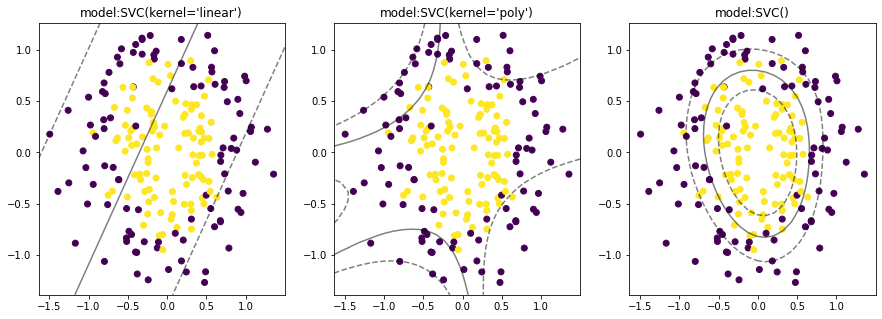

In [6]:
#1-1
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=0)
linear = SVC(kernel='linear')
poly = SVC(kernel='poly')
rbf = SVC(kernel='rbf')

linear.fit(X,y)
poly.fit(X,y)
rbf.fit(X,y)

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.scatter(X[:,0],X[:,1],c=y)
ax2.scatter(X[:,0],X[:,1],c=y)
ax3.scatter(X[:,0],X[:,1],c=y)
plot_svc_decision_function(linear,ax=ax1)
plot_svc_decision_function(poly,ax=ax2)
plot_svc_decision_function(rbf,ax=ax3)

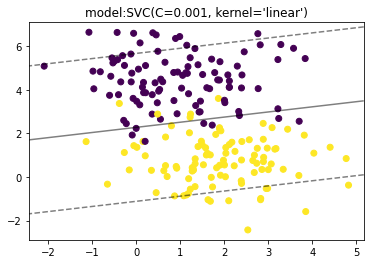

In [7]:
#1-2
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)
C = 0.001

linear = SVC(kernel='linear',C=C)

linear.fit(X,y)

fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1],c=y)

plot_svc_decision_function(linear,ax=ax)

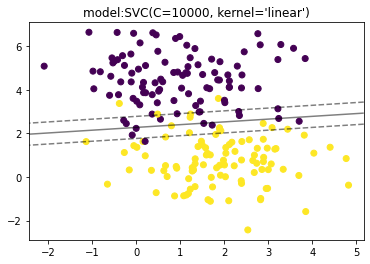

In [8]:
#1-2
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)
C = 10000

linear = SVC(kernel='linear',C=C)

linear.fit(X,y)

fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1],c=y)

plot_svc_decision_function(linear,ax=ax)

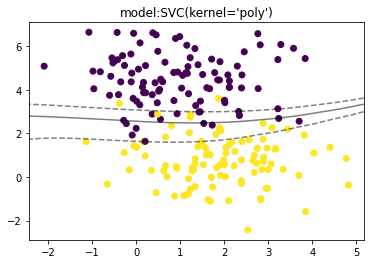

In [9]:
#1-3
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

poly = SVC(kernel='poly',degree=3)

poly.fit(X,y)

fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1],c=y)

plot_svc_decision_function(poly,ax=ax)

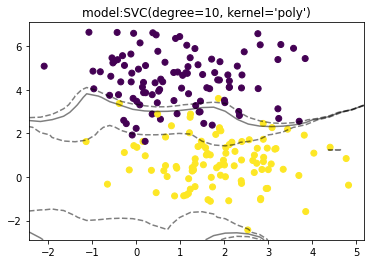

In [10]:
#1-3
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

poly = SVC(kernel='poly',degree=10)

poly.fit(X,y)

fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1],c=y)

plot_svc_decision_function(poly,ax=ax)

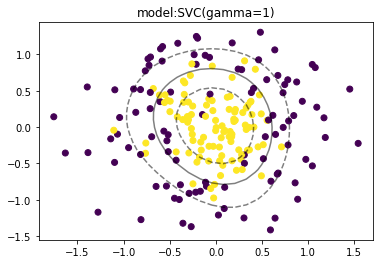

In [11]:
#1-4
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=0)

rbf = SVC(kernel='rbf',gamma=1)

rbf.fit(X,y)

fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1],c=y)

plot_svc_decision_function(rbf,ax=ax)

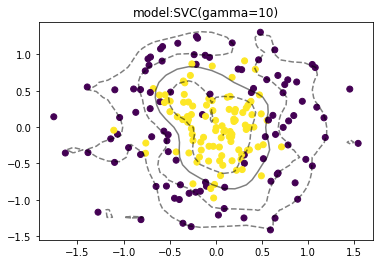

In [12]:
#1-4
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=0)

rbf = SVC(kernel='rbf',gamma=10)

rbf.fit(X,y)

fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1],c=y)

plot_svc_decision_function(rbf,ax=ax)

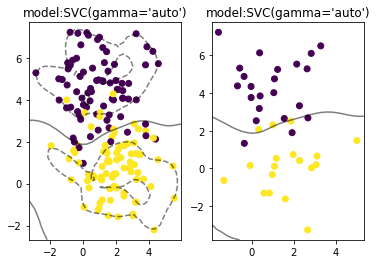

In [13]:
#2-1
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

gamma = 'auto'

rbf = SVC(kernel='rbf',gamma=gamma)

rbf.fit(X_train,y_train)

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax2.scatter(X_test[:,0],X_test[:,1],c=y_test)

plot_svc_decision_function(rbf,ax=ax1,mode='train')
plot_svc_decision_function(rbf,ax=ax2,mode='test')

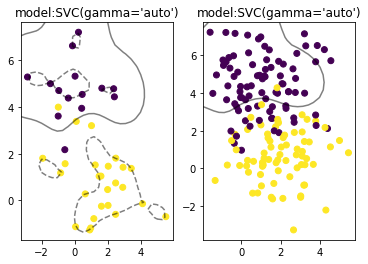

In [14]:
#2-1
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

gamma = 'auto'

rbf = SVC(kernel='rbf',gamma=gamma)

rbf.fit(X_train,y_train)

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax2.scatter(X_test[:,0],X_test[:,1],c=y_test)

plot_svc_decision_function(rbf,ax=ax1,mode='train')
plot_svc_decision_function(rbf,ax=ax2,mode='test')

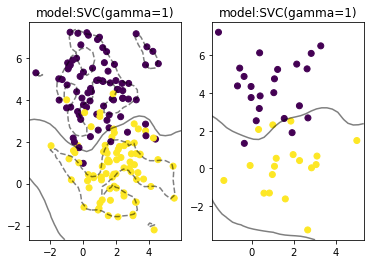

In [15]:
#2-2
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

gamma = 1

rbf = SVC(kernel='rbf',gamma=gamma)

rbf.fit(X_train,y_train)

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax2.scatter(X_test[:,0],X_test[:,1],c=y_test)

plot_svc_decision_function(rbf,ax=ax1,mode='train')
plot_svc_decision_function(rbf,ax=ax2,mode='test')

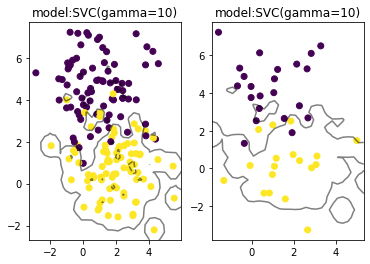

In [16]:
#2-2
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

gamma = 10

rbf = SVC(kernel='rbf',gamma=gamma)

rbf.fit(X_train,y_train)

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax2.scatter(X_test[:,0],X_test[:,1],c=y_test)

plot_svc_decision_function(rbf,ax=ax1,mode='train')
plot_svc_decision_function(rbf,ax=ax2,mode='test')

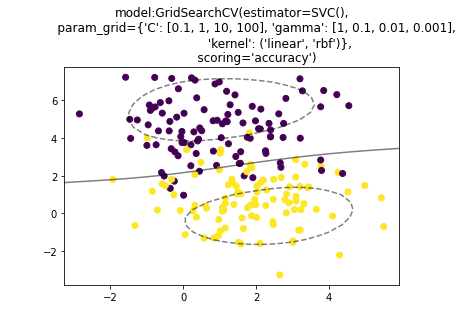

In [17]:
#2-3
from sklearn.metrics import confusion_matrix

X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

parameters = {'kernel': ('linear','rbf'), 'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
svc = SVC()

grid_search = GridSearchCV(svc, parameters,scoring = 'accuracy')
grid_search.fit(X,y)

fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1],c=y)

plot_svc_decision_function(grid_search,ax=ax)

Text(0.5, 1.0, 'worst fractal dimension')

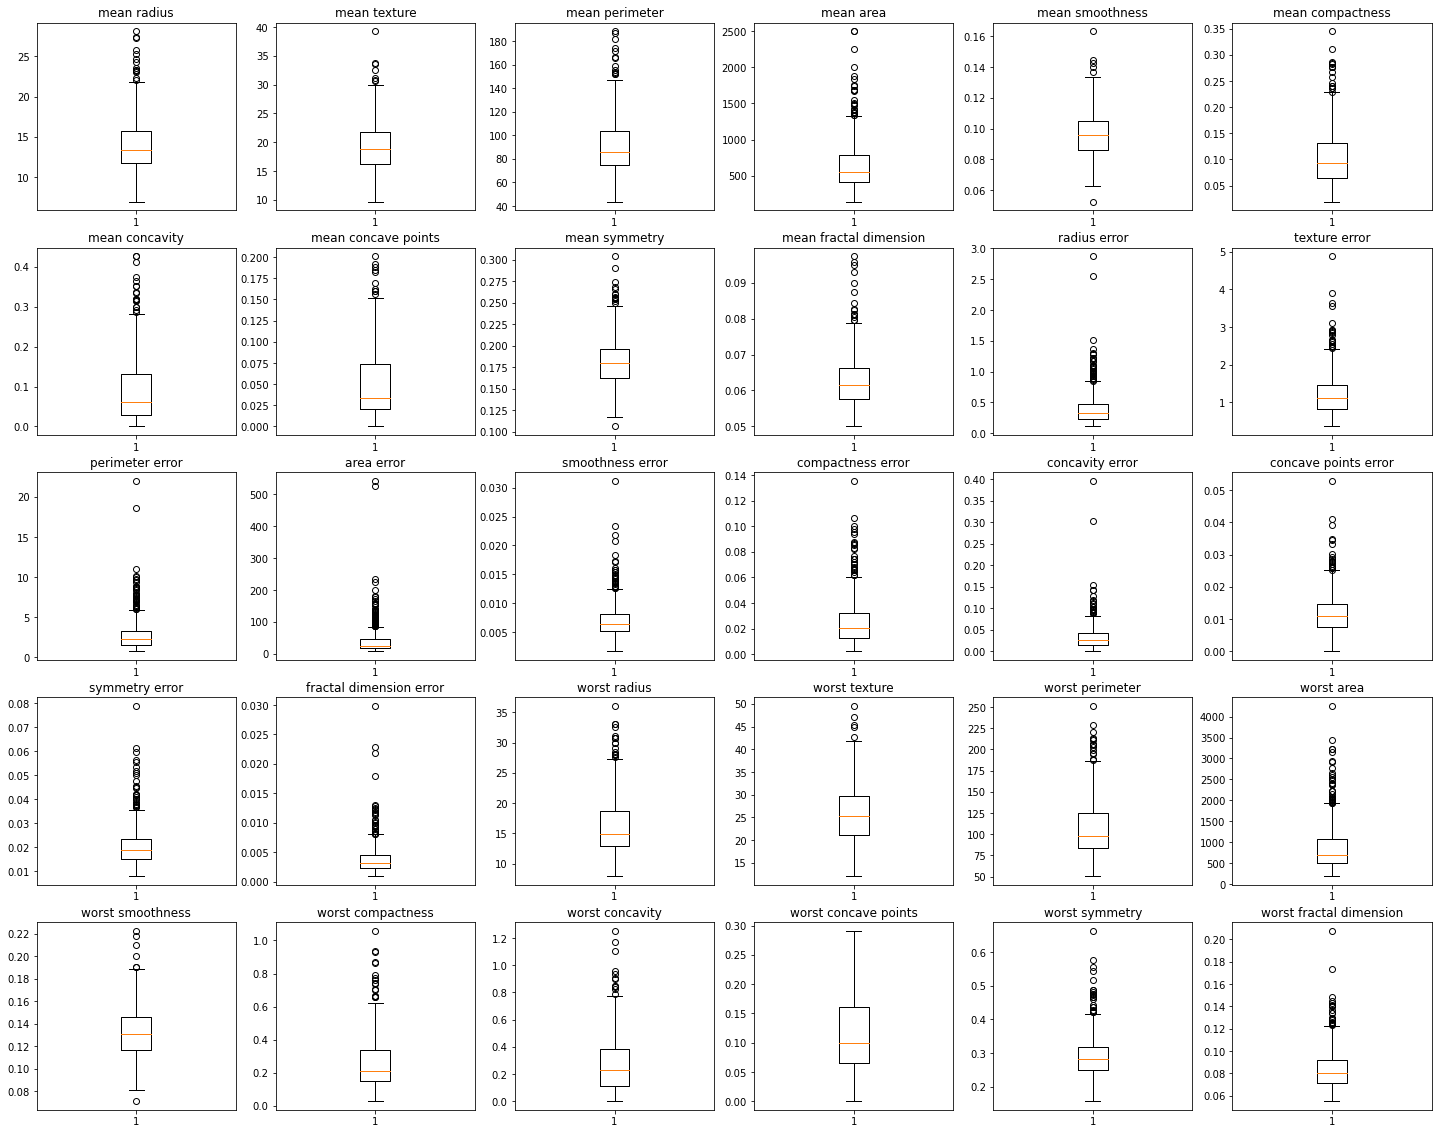

In [18]:
#3-1
data = load_breast_cancer()

fig, ((ax1,ax2,ax3,ax4,ax5,ax6),(ax7,ax8,ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16,ax17,ax18),(ax19,ax20,ax21,ax22,ax23,ax24),(ax25,ax26,ax27,ax28,ax29,ax30)) = plt.subplots(5,6)
fig.set_figheight(20)
fig.set_figwidth(25)
ax1.boxplot(data['data'][:,0])
ax1.set_title(data['feature_names'][0])

ax2.boxplot(data['data'][:,1])
ax2.set_title(data['feature_names'][1])

ax3.boxplot(data['data'][:,2])
ax3.set_title(data['feature_names'][2])

ax4.boxplot(data['data'][:,3])
ax4.set_title(data['feature_names'][3])

ax5.boxplot(data['data'][:,4])
ax5.set_title(data['feature_names'][4])

ax6.boxplot(data['data'][:,5])
ax6.set_title(data['feature_names'][5])

ax7.boxplot(data['data'][:,6])
ax7.set_title(data['feature_names'][6])

ax8.boxplot(data['data'][:,7])
ax8.set_title(data['feature_names'][7])

ax9.boxplot(data['data'][:,8])
ax9.set_title(data['feature_names'][8])

ax10.boxplot(data['data'][:,9])
ax10.set_title(data['feature_names'][9])

ax11.boxplot(data['data'][:,10])
ax11.set_title(data['feature_names'][10])

ax12.boxplot(data['data'][:,11])
ax12.set_title(data['feature_names'][11])

ax13.boxplot(data['data'][:,12])
ax13.set_title(data['feature_names'][12])

ax14.boxplot(data['data'][:,13])
ax14.set_title(data['feature_names'][13])

ax15.boxplot(data['data'][:,14])
ax15.set_title(data['feature_names'][14])

ax16.boxplot(data['data'][:,15])
ax16.set_title(data['feature_names'][15])

ax17.boxplot(data['data'][:,16])
ax17.set_title(data['feature_names'][16])

ax18.boxplot(data['data'][:,17])
ax18.set_title(data['feature_names'][17])

ax19.boxplot(data['data'][:,18])
ax19.set_title(data['feature_names'][18])

ax20.boxplot(data['data'][:,19])
ax20.set_title(data['feature_names'][19])

ax21.boxplot(data['data'][:,20])
ax21.set_title(data['feature_names'][20])

ax22.boxplot(data['data'][:,21])
ax22.set_title(data['feature_names'][21])

ax23.boxplot(data['data'][:,22])
ax23.set_title(data['feature_names'][22])

ax24.boxplot(data['data'][:,23])
ax24.set_title(data['feature_names'][23])

ax25.boxplot(data['data'][:,24])
ax25.set_title(data['feature_names'][24])

ax26.boxplot(data['data'][:,25])
ax26.set_title(data['feature_names'][25])

ax27.boxplot(data['data'][:,26])
ax27.set_title(data['feature_names'][26])

ax28.boxplot(data['data'][:,27])
ax28.set_title(data['feature_names'][27])

ax29.boxplot(data['data'][:,28])
ax29.set_title(data['feature_names'][28])

ax30.boxplot(data['data'][:,29])
ax30.set_title(data['feature_names'][29])



Text(0.5, 1.0, 'worst fractal dimension')

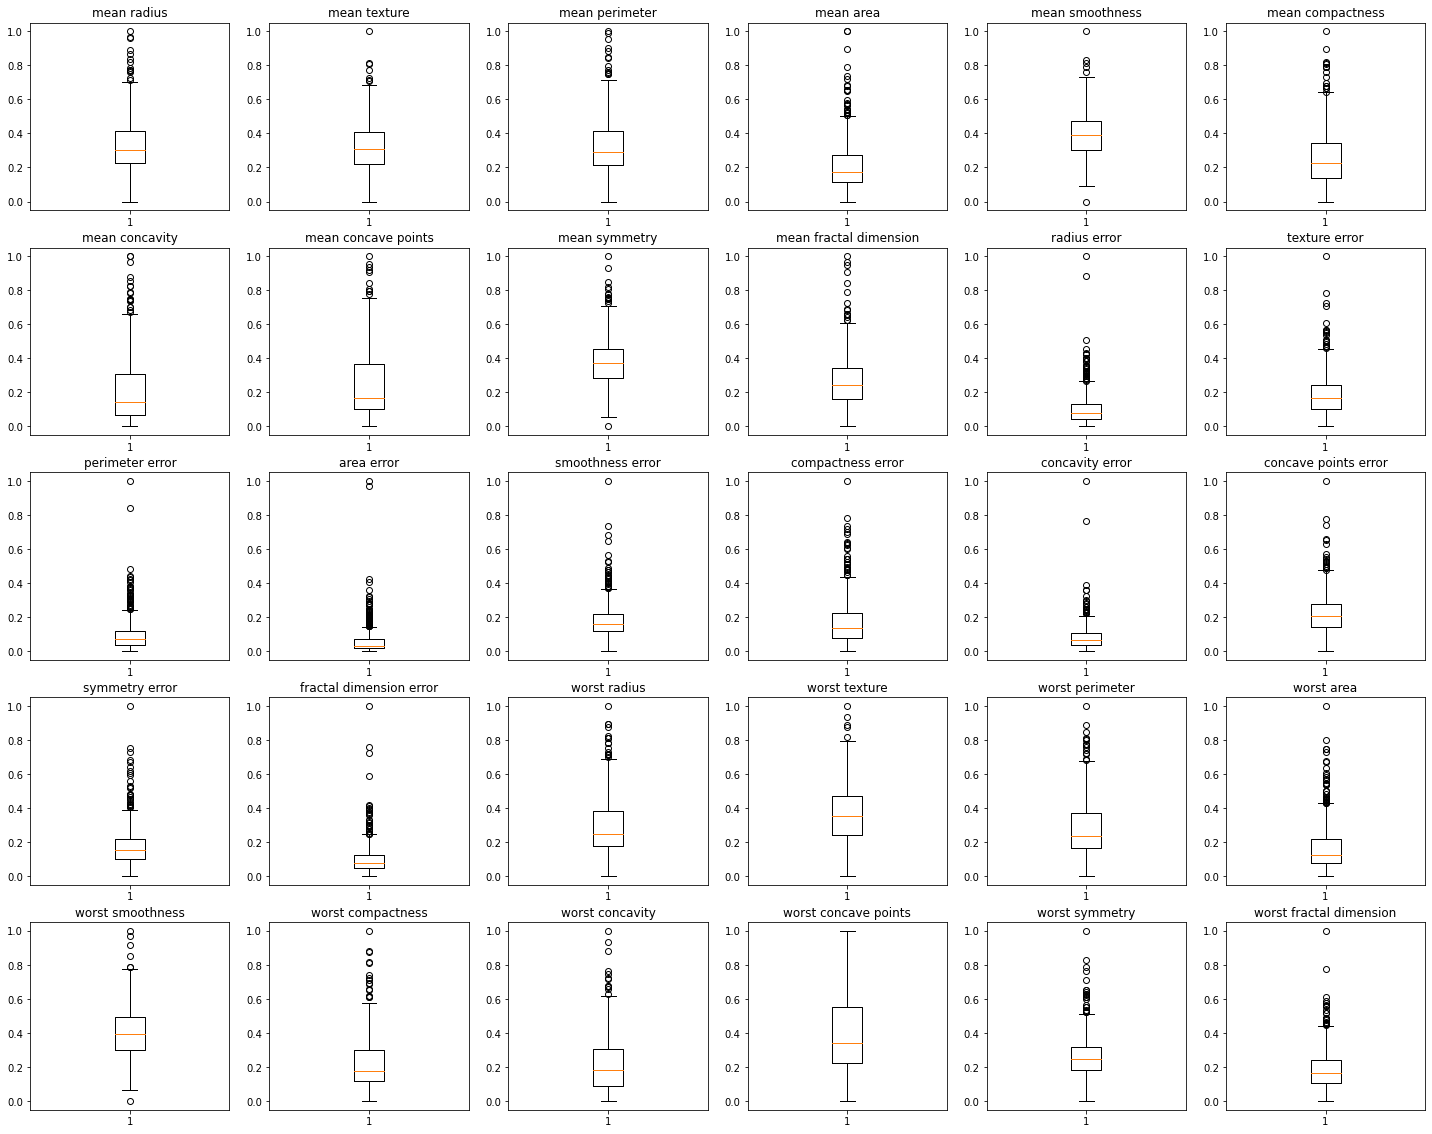

In [19]:
data = load_breast_cancer()

mns = MinMaxScaler()
data['data'] = mns.fit_transform(data['data'])

fig, ((ax1,ax2,ax3,ax4,ax5,ax6),(ax7,ax8,ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16,ax17,ax18),(ax19,ax20,ax21,ax22,ax23,ax24),(ax25,ax26,ax27,ax28,ax29,ax30)) = plt.subplots(5,6)
fig.set_figheight(20)
fig.set_figwidth(25)
ax1.boxplot(data['data'][:,0])
ax1.set_title(data['feature_names'][0])

ax2.boxplot(data['data'][:,1])
ax2.set_title(data['feature_names'][1])

ax3.boxplot(data['data'][:,2])
ax3.set_title(data['feature_names'][2])

ax4.boxplot(data['data'][:,3])
ax4.set_title(data['feature_names'][3])

ax5.boxplot(data['data'][:,4])
ax5.set_title(data['feature_names'][4])

ax6.boxplot(data['data'][:,5])
ax6.set_title(data['feature_names'][5])

ax7.boxplot(data['data'][:,6])
ax7.set_title(data['feature_names'][6])

ax8.boxplot(data['data'][:,7])
ax8.set_title(data['feature_names'][7])

ax9.boxplot(data['data'][:,8])
ax9.set_title(data['feature_names'][8])

ax10.boxplot(data['data'][:,9])
ax10.set_title(data['feature_names'][9])

ax11.boxplot(data['data'][:,10])
ax11.set_title(data['feature_names'][10])

ax12.boxplot(data['data'][:,11])
ax12.set_title(data['feature_names'][11])

ax13.boxplot(data['data'][:,12])
ax13.set_title(data['feature_names'][12])

ax14.boxplot(data['data'][:,13])
ax14.set_title(data['feature_names'][13])

ax15.boxplot(data['data'][:,14])
ax15.set_title(data['feature_names'][14])

ax16.boxplot(data['data'][:,15])
ax16.set_title(data['feature_names'][15])

ax17.boxplot(data['data'][:,16])
ax17.set_title(data['feature_names'][16])

ax18.boxplot(data['data'][:,17])
ax18.set_title(data['feature_names'][17])

ax19.boxplot(data['data'][:,18])
ax19.set_title(data['feature_names'][18])

ax20.boxplot(data['data'][:,19])
ax20.set_title(data['feature_names'][19])

ax21.boxplot(data['data'][:,20])
ax21.set_title(data['feature_names'][20])

ax22.boxplot(data['data'][:,21])
ax22.set_title(data['feature_names'][21])

ax23.boxplot(data['data'][:,22])
ax23.set_title(data['feature_names'][22])

ax24.boxplot(data['data'][:,23])
ax24.set_title(data['feature_names'][23])

ax25.boxplot(data['data'][:,24])
ax25.set_title(data['feature_names'][24])

ax26.boxplot(data['data'][:,25])
ax26.set_title(data['feature_names'][25])

ax27.boxplot(data['data'][:,26])
ax27.set_title(data['feature_names'][26])

ax28.boxplot(data['data'][:,27])
ax28.set_title(data['feature_names'][27])

ax29.boxplot(data['data'][:,28])
ax29.set_title(data['feature_names'][28])

ax30.boxplot(data['data'][:,29])
ax30.set_title(data['feature_names'][29])

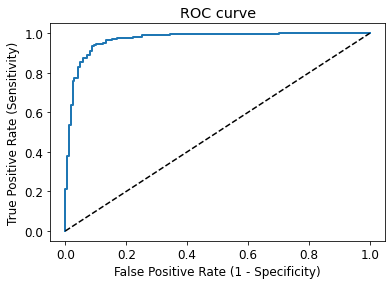

ROC AUC : 0.9694


In [24]:
#3-2
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
data = load_breast_cancer()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 12)

linear = SVC(kernel='linear',C=10,probability=True)
linear.fit(X_train,y_train)
linear_proba = linear.predict_proba(X_test)
linear_proba = linear_proba[:,1]
fpr, tpr, thresholds = roc_curve(y_test, linear_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(y_test, linear_proba)
print('ROC AUC : {:.4f}'.format(ROC_AUC))


In [26]:
#3-3
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data = load_breast_cancer()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 12)
linear = SVC(kernel='linear',C=10,probability=True)
linear.fit(X_train,y_train)

cm_test = confusion_matrix(y_test,linear.predict(X_test))
cm_train = confusion_matrix(y_train,linear.predict(X_train))

print('Confusion matrix_test\n', cm_test)
print('Confusion matrix_train\n', cm_train)
print(classification_report(y_test, linear.predict(X_test)))
TP = cm_test[0,0]
TN = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Accuracy : {0:0.4f}'.format(accuracy))


Confusion matrix test
 [[143  28]
 [  9 276]]
Confusion matrix train
 [[40  1]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       171
           1       0.91      0.97      0.94       285

    accuracy                           0.92       456
   macro avg       0.92      0.90      0.91       456
weighted avg       0.92      0.92      0.92       456

Accuracy : 0.9189
